# ***Leo Messi***

*Né le 24 juin 1987 à Rosario en Argentine, Lionel Messi, parfois surnommé Leo Messi, est considéré comme l’un des plus grands joueurs de football de tous les temps.*

##### *Faire les imports necessaires pour l'analyse*

In [26]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as ols

### **Analyser la platforme**

##### *Afficher le permiers lignes du base*

In [27]:
messi = pd.read_csv('/Users/yass/Desktop/python_project/data.csv', encoding='latin-1')
messi.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


##### *On Vas ajouter un column dans la position 12 nommee Goals*

In [28]:
messi.insert(12, "Goals", 1, True)
messi.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goals,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,1,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,1,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,1,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,1,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,1,Ronaldinho Gaacho


##### *Les buts marquees dasns les six permiers season*

In [29]:
goal_seasons= pd.DataFrame(messi.groupby(messi['Season'].tolist()).size(),columns=['Goals'])
goal_seasons[0:6]

,Goals
04/05,1
05/06,8
06/07,17
07/08,16
08/09,38
09/10,47


##### *GRAPH: Buts pour chaque Saison*

In [30]:
import plotly.graph_objects as go
np.random.seed(42)

layout = go.Layout(
    title="Les buts pour chaque season",
    xaxis_title="Saisons",
    yaxis_title="Buts"
)

fig = go.Figure(
    data=go.Scatter(x= goal_seasons.index, y=goal_seasons.Goals),
    layout=layout
)
fig.show()

##### *Totales des buts marquees dans chaque competition*

In [31]:
goal_competition= pd.DataFrame(messi.groupby(messi.Competition.tolist()).size(),columns=['goals'])
goal_competition

,goals
Champions League,1
Copa del Rey,56
FIFA Club World Cup,5
LaLiga,474
Ligue 1,14
Supercopa,14
TrophÃ©e des Champions,1
Trophée des Champions,1
UEFA Champions League,128
UEFA Super Cup,3


##### *GRAPH: Buts pour chaque competition*

In [32]:
layout = go.Layout(
    title="Buts pour chaque competition",
    xaxis_title="competitions",
    yaxis_title="Buts"
)

fig = go.Figure(
    data=go.Bar(x= goal_competition.index,y= goal_competition.goals),
    layout=layout
)
fig.show()

##### *GRAPH: Buts de UEFA Champions League*

In [33]:
select_indices = list(np.where(messi["Competition"] == 'UEFA Champions League')[0])
Champions_League = messi.iloc[select_indices]

In [34]:
Champions_League= pd.DataFrame(Champions_League.groupby(Champions_League['Season'].tolist()).size(),columns=['goals'])
layout2 = go.Layout(
    title="Buts de UEFA Champions League",
    xaxis_title="Champions League Saisons",
    yaxis_title="Buts"
)

fig2 = go.Figure(
    data=go.Bar(x= Champions_League.index,y= Champions_League.goals),
    layout=layout2
)
fig2.show()

##### *GRAPH: Buts de La Liga

In [35]:
select_indices = list(np.where(messi["Competition"] == 'LaLiga')[0])
LaLiga = messi.iloc[select_indices]

In [36]:
LaLiga_seasons= pd.DataFrame(LaLiga.groupby(LaLiga['Season'].tolist()).size(),columns=['goals'])
layout1 = go.Layout(
    title="Buts de la Liga par seasons",
    xaxis_title="LaLiga saison",
    yaxis_title="Buts"
)

fig1 = go.Figure(
    data=go.Bar(x= sorted(LaLiga_seasons.index),y= LaLiga_seasons.goals),
    layout=layout1
)
fig1.show()

In [37]:
realmadrid = messi["Opponent"] == "Real Madrid"
messi[realmadrid][0:5]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goals,Goal_assist
13,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,11,1:01,Left-footed shot,1,Samuel Etoo
14,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,28,2:02,Left-footed shot,1,NaN
15,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,90+1,3:03,Left-footed shot,1,Ronaldinho Gaacho
57,08/09,LaLiga,15,12/13/08,H,FC Barcelona,Real Madrid,2:00,RW,89,2:00,Counter attack goal,1,Thierry Henry
76,08/09,LaLiga,34,05-02/09,A,FC Barcelona,Real Madrid,2:06,CF,35,1:03,Left-footed shot,1,Xavi


In [38]:
messi["Competition"].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'TrophÃ©e des Champions', 'Trophée des Champions',
       'Champions League'], dtype=object)

##### *GRAPH: Buts des competitions par saisons*

In [39]:
import plotly.express as px

Copa = list(np.where(messi["Competition"] == 'Copa del Rey')[0])
Supercopa = list(np.where(messi["Competition"] == 'Supercopa')[0])
FIFA  = list(np.where(messi["Competition"] == 'FIFA Club World Cup')[0])
UEFA  = list(np.where(messi["Competition"] == 'UEFA Super Cup')[0])
Ligue  = list(np.where(messi["Competition"] == 'Ligue 1')[0])

Champions = messi.iloc[Copa + Supercopa + FIFA + UEFA + Ligue]

data = px.bar( x= Champions.Season, y= Champions.Goals, color= Champions.Competition ,barmode='group')
data.update_layout(    
    title="Buts des competition par saisons",
    xaxis_title="competitions",
    yaxis_title="Buts")
data.update_xaxes(showgrid=True)

data.show()

# Les buts marques par annee

In [40]:
messi.shape

(697, 14)

In [41]:
messi.Date = pd.to_datetime(messi.Date)

In [42]:
messi['day'] = messi['Date'].dt.day
messi['month'] = messi['Date'].dt.month
messi['year'] = messi['Date'].dt.year

In [43]:
messi.head(2)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goals,Goal_assist,day,month,year
0,04/05,LaLiga,34,2005-05-01,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,1,Ronaldinho Gaacho,1,5,2005
1,05/06,UEFA Champions League,Group Stage,2005-11-02,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,1,NaN,2,11,2005


In [44]:
messi['year'].value_counts().sort_values(ascending=False)

2012    79
2010    58
2011    55
2016    51
2014    50
2017    50
2015    48
2018    47
2019    45
2013    39
2009    38
2021    34
2020    26
2007    25
2008    20
2022    19
2006    10
2005     3
Name: year, dtype: int64

In [45]:
messi.shape

(697, 17)

# Graph Buts marque par annee en utilisant le Matlalib

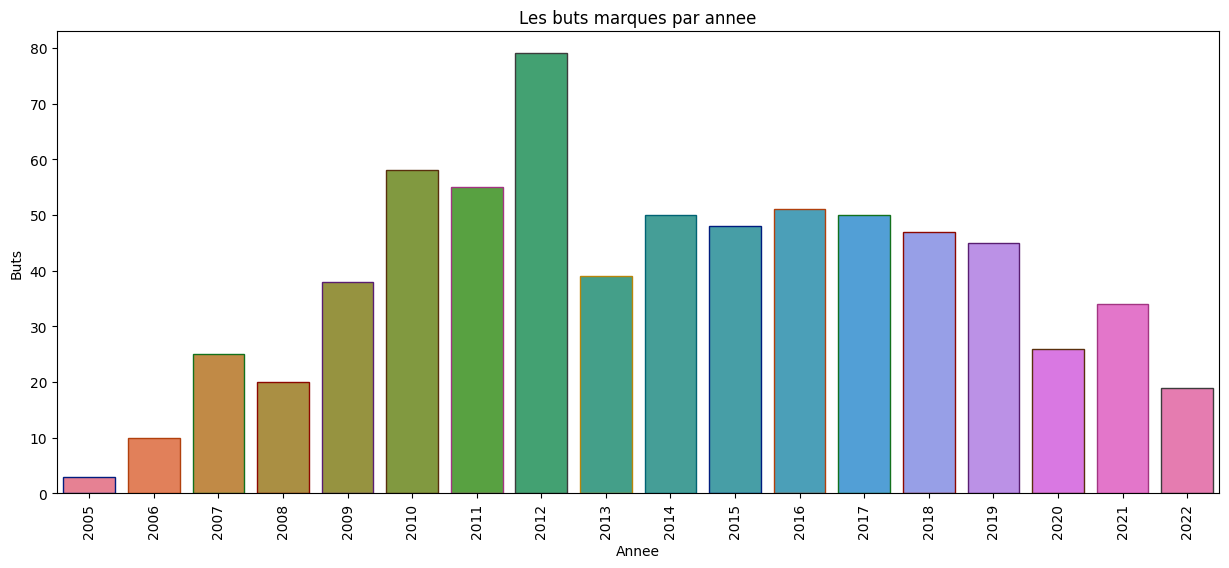

In [46]:
ols.subplots(figsize=(15,6))
sns.barplot(x=list(messi["year"].value_counts().keys()),y=list(messi['year'].value_counts())
            ,palette='husl',edgecolor=sns.color_palette('dark',10))
ols.xticks(rotation=90)
ols.xlabel("Annee")
ols.ylabel("Buts")
ols.title('Les buts marques par annee')
ols.show()

# Les Assistes

In [47]:
Assist = messi[~(messi['Goal_assist'] == 'Unknown')]
Assist.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goals,Goal_assist,day,month,year
0,04/05,LaLiga,34,2005-05-01,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,1,Ronaldinho Gaacho,1,5,2005
1,05/06,UEFA Champions League,Group Stage,2005-11-02,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,1,NaN,2,11,2005
2,05/06,LaLiga,13,2005-11-27,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,1,Samuel Etoo,27,11,2005
3,05/06,LaLiga,19,2006-01-15,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,1,Mark van Bommel,15,1,2006
4,05/06,LaLiga,20,2006-01-22,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,1,Ronaldinho Gaacho,22,1,2006


# Top 10 joueurs qui ont fait l'assiste

In [48]:
asiistbuts = Assist['Goal_assist'].value_counts().sort_values(ascending=False)[:10]
asiistbuts

Luis Suarez        48
Dani Alves         42
Andres Iniesta     39
Xavi               34
Neymar             30
Pedro              29
Jordi Alba         23
Ivan Rakitic       19
Sergio Busquets    19
Cesc Fabregas      14
Name: Goal_assist, dtype: int64

In [49]:
layout2 = go.Layout(
    title="Buts pour chaque competition",
    xaxis_title="competitions",
    yaxis_title="Buts"
)

fig2 = go.Figure(
    data=go.Bar(x= asiistbuts.index,y= asiistbuts),
    layout2=layout2
)
fig2.show()

TypeError: invalid Figure property: layout2
layout2
Bad property path:
layout2
^^^^^^^